# Multiple Linear Regression Part 2: Advanced Regression Analysis

© Explore Data Science Academy

## Learning Objectives

Within this Train we seek to cover the following learning objectives:

- Introduction to and understanding of linearity and multicollinearity (predictors);
- Introduction to and understanding of independence, homoscedasticity, and normality (residuals);
- Using the `statsmodels` library to fit and evaluate a regression.

## Outline

We'll be moving through the following sections in order to achieve our objectives:

- Dataset overview;
- Investigating our predictor variables:
    - Checking for linearity;
    - Checking for multicollinearity;
- Fitting a model with `statsmodels.OLS`;
- Evaluating our fitted model:
    - Checking for independence;
    - Checking for homoscedasticity;
    - Checking for normaility;
    - Checking for outliers.

## Introduction

In *Multiple Linear Regression Part 1*, we learned about fitting a regression model using multiple predictors using `sklearn`. It was an easy process requiring the same steps as fitting a simple linear regression model using just one predictor. We then performed a rudimentary quality assessment of the fitted model using the MSE and RMSE metrics.

Unfortunately, in terms of regression, `sklearn` has a very limited set of metrics and tools with which we can evaluate the quality of our fitted models. Furthermore, we are also in need of additional methods which will allow us to check the properties of our original data before we perform any modelling.  

In this train we cover a thorough set of steps grounded in statistical tests to better determine the quality of a regression model. This train is an adaptation of [this Medium article](https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685).

## Dataset Overview - MTCars

For this train, we continue to make use of the MTCars dataset which we were introduced to within *Multiple Linear Regression Part 1*. We begin by importing some libraries which will help us load and explore our data. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0)
df.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


It appears both `vs` and `am` are categorical variables. From the dataset description [available here](https://rpubs.com/neros/61800), `vs` takes on a value of 0/1 depending on whether the engine layout is a *V* or *straight*, and `am` takes on a 0/1 value depending on whether the transmission is *automatic* or *manual*, both respectively.

We don't need to one-hot encode them because they are binary categorical variables (only two categories each), and they already make use of zeros and ones.

## Checking for Linearity

The first thing we need to check is the mathematical relationship between each predictor variable and the response variable. What we are looking for here is known as linearity. A linear relationship means that a change in the response *Y* due to a one-unit change in the predictor $X_j$ is constant, regardless of the value of $X_j$.

If we fit a regression model to a dataset that is non-linear, it will fail to adequately capture the relationship in the data - resulting in a mathematically inappropriate model. In order to check for linearity, we can produce scatter plots of each individual predictor against the response variable. The intuition here is that we are looking for obvious linear relationships.

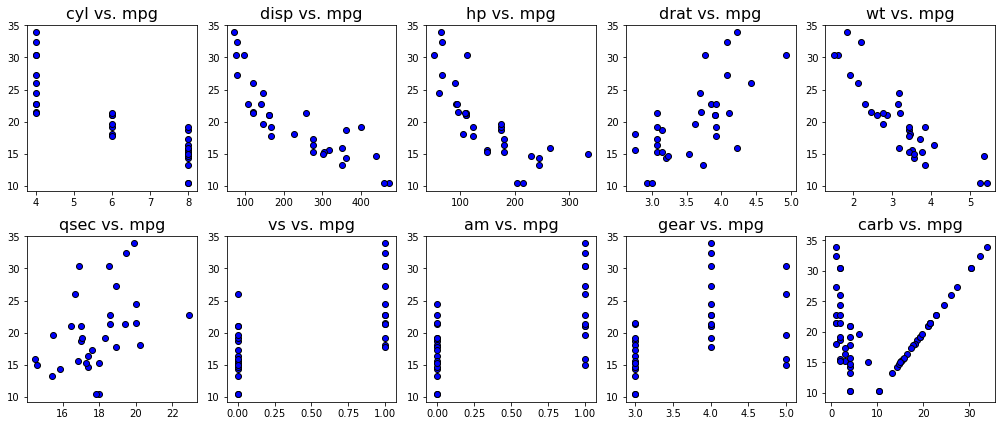

In [15]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. mpg".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['mpg'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

It appears at least half of the variables, including all five on the top row, have an approximately linear relationship. Here a trend between each of `cyl, disp, hp, drat, wt`, and `qsec` and `mpg` seems to exist. However, `carb` and `gear` exhibit no linearity with `mpg`.

Based on these observations, it appears there is sufficient linearity present to proceed with applying a linear regression model. Let's continue.

We'll create a copy of the dataset so that we can play with and process it using `statsmodels.OLS()`, which is the least squares regression module within the `statsmodels` library. We'll be carrying out our regression with this module.

In [16]:
df1 = df.copy()

## Checking for Multicollinearity

Multicollinearity refers to the presence of strong correlation among two or more of the predictor variables in the dataset. The presence of any correlation among predictors is detrimental to model quality for two reasons:

- It tends to increase the standard error;

- It becomes difficult to estimate the effect of any one predictor variable on the response variable.

We will check for multicollinearity by generating pairwise scatter plots among predictors, and further, generating a correlation heatmap.

### Pairwise scatter plots

As can be inferred by the name, a pairwise scatter plot simply produces a visual $n \times n$ matrix, where $n$ is the total number of variables compared, in which each cell represents the relationship between two variables. The diagonal cells of this visual represent the comparison of a variable with itself, and as such are substituted by a representation of the distribution of values taken by the visual.     

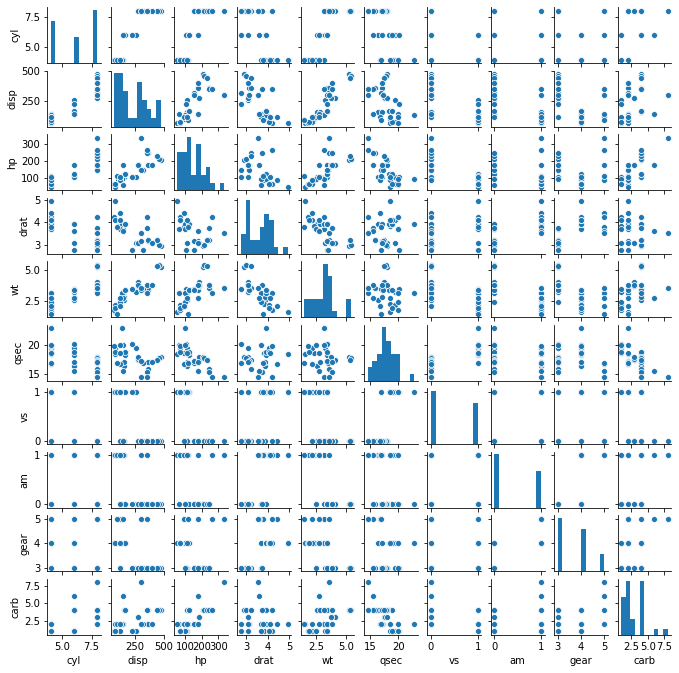

In [17]:
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
g = pairplot(df1.drop('mpg', axis='columns'))
g.fig.set_size_inches(9,9)

### Correlation heatmap

Another way we can visually discover linearity between two or more variables within our dataset is through the use of a correlation heatmap. Similar to the pairwise scatter plot we produced above, this visual presents a matrix in which each row represents a distinct variable, with each colum representing the correlation between this variable and another one within the dataset.    

In [21]:
# We only compare the predictor variables, and thus drop the target `mpg` column.
corr = df1.drop('mpg', axis='columns').corr()

In [19]:
from statsmodels.graphics.correlation import plot_corr

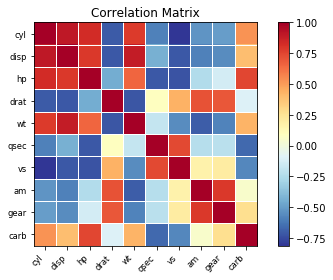

In [20]:
fig=plot_corr(corr,xnames=corr.columns)

From both the pairwise scatterplot and correlation heatmap, we can see a number of strong correlations among predictors:

- `disp` and `cyl`;
- `cyl` and `hp`;
- `hp` and `carb`;
- `cyl` and `vs`;
- `cyl` and `wt`.

Let's keep these in mind when we build and continue to check the quality of our model.

## Fitting the model using `statsmodels.OLS`

As was previously motivated within the train, `sklearn` is limited in terms of metrics and tools available to evaluate the appropriateness of the regression models we fit. Thus, as a means to expland our analysis, we import the `statsmodels` library which has a rich set of statistical tools to help us. 

In [22]:
import statsmodels.formula.api as sm

### Generating the regression string

Those of you familiar with the R language will know that fitting a machine learning model requires a sort of string of the form:

`y ~ X`

which is read as follows: "Regress y on X". The `statsmodels` library works in a similar way, so we need to generate an appropriate string to feed to the method when we wish to fit the model.

In [23]:
formula_str = df1.columns[0]+' ~ '+'+'.join(df1.columns[1:]); formula_str

'mpg ~ cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb'

In other words, we will regress `mpg` on all of the predictors.

### Construct and fit the model

We now go ahead and fit our model. We use the `ols` or Ordinary Least Squares regression model from the `statsmodels` library to do this:  

In [24]:
model=sm.ols(formula=formula_str, data=df1)

In [25]:
fitted = model.fit()

### Print model summary

Unlike the `sklearn` models we've seen so far which only produce a couple of statistics following the fitting process, our new model produces a rich set of statistics to help us analyse its appropriateness.   

In [26]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           3.79e-07
Time:                        16:17:58   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

## Checking for Independence

We have done checks for linearity and multicollinearity, which both referred to the predictor variables. Now we'll move on to checking some of the artefacts of the fitted model for three more statistical phenomena which further help us determine its quality.

### Residuals vs. Predictor Variables Plots 

The first check we do involves plotting the residuals (vertical distances between each data point and the regression hyperplane). We are looking to confirm the independence assumption here, i.e.: the residuals should be independent. If they are, we will see:

- Residuals approximately uniformly randomly distributed about the zero x-axes;

- Residuals not forming specific clusters.

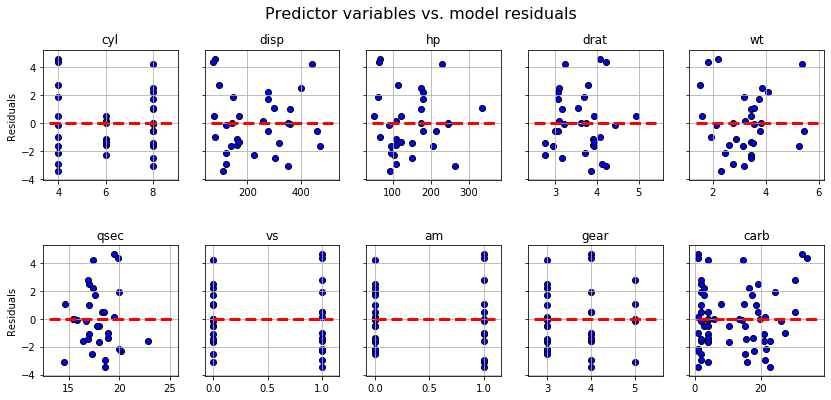

In [27]:
fig, axs = plt.subplots(2,5, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=df[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(df[column])
    xmax = max(df[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')

Observing the plots above, two things are relatively clear:

- All of the residuals are slightly to skewed to the positive (reaching +5 but only about -3);

- There is no obvious clustering, except for `cyl` which may present a cluster on the value 6.

Our conclusion here is that the residuals are largely independent.

## Checking for Homoscedasticity

The next check we'll do is for whether the variance of the residuals (the error terms) is constant as the fitted values increase. 

### Fitted vs. Residuals

We can determine this by plotting the magnitude of the fitted values (i.e.: `mpg`) against the residuals. What we are looking for is the plotted points to approximately form a rectangle. In other words, the magnitude of the residuals should not increase as the fitted values increase (if that is the case, the data will form the shape of a cone on its side).

If the variance is constant, we have observed _homoscedasticity_. If the variance is not constant, we have observed _heteroscedasticity_. We can use the same plot to check for outliers: any plotted points that are visibly seperate from the random pattern of the rest of the residuals.

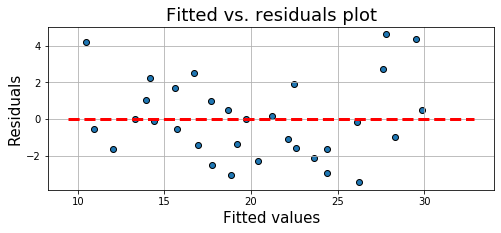

In [28]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

It appears the points towards the right-hand side of the plot tend to be scattered slightly less densely, indicating the presence of heteroscedasticity. This violates our assumption of homoscedasticity. The presence of these outliers means that those values are weighted too heavily in the prediction process, disproportionately influencing the model's performance. This in turn can lead to the confidence interval for out of sample predictions (unseen data) being unrealistically wide or narrow.

## Checking for Normality

Here we attempt to confirm our assumption of normality amongst the residuals. If the residuals are non-normally distributed, confidence intervals can become too wide or too narrow, which leads to difficulty in estimating coefficients based on the minimisation of ordinary least squares.

We can check for violation of the normality assumption in two different ways:

1. Plotting a histogram of the normalised residuals;

2. Generating a Q-Q plot of the residuals.

### Histogram of Normalized Residuals

We plot a histogram of the residuals to take a look at their distribution. It is fairly easy to pick up when a distribution looks similar to the classic _bell curve_ shape of the normal distribution.

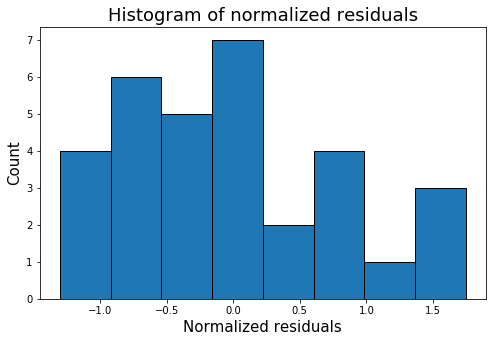

In [29]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

### Q-Q plot of the residuals

A Q-Q plot, also known as a quantile-quantile plot, attempts to plot the theoretical quantiles of the standard normal distribution against the quantiles of the residuals. The one-to-one line, indicated in red below, is the ideal line indicating normality. The closer the plotted points are to the red line, the closer the residual distribution is to the standard normal distribution.

In [31]:
# We once again use the statsmodel library to assist us in producing our qqplot visualisation. 
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

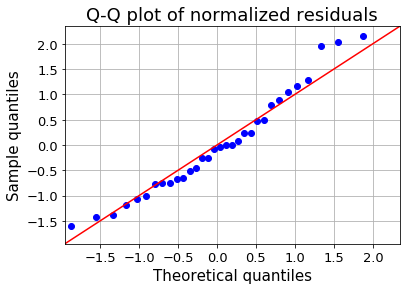

In [32]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

Judging only from the two checks above, the residuals do appear to be normally distributed.

## Checking for Outliers in Residuals

The last check we'll make is for outliers amongst the residuals.

### Plotting Cook's Distance

Cook's distance is a calculation which measures the effect of deleting an observation from the data. Observations with large Cook's distances should be earmarked for closer examination in the analysis due to their disproportionate impact on the model.

In [33]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [34]:
inf=influence(fitted)

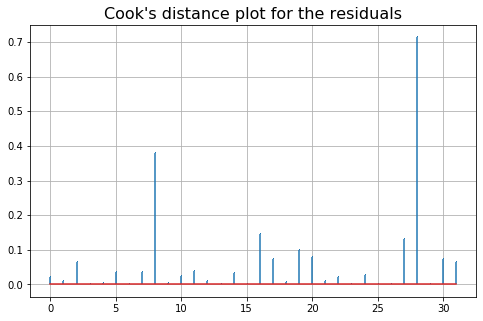

In [38]:
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.grid(True)
plt.show()

Clearly there are at least two values with much higher Cook's distances than the rest. A rule of thumb for determining whether a Cook's distance is too large is whether it is greater than four times the mean Cook's distance. Let's calculate the mean.

In [39]:
print('Mean Cook\'s distance: ', c.mean())

Mean Cook's distance:  0.0661114462748523


It does appear that observations 8 and 28 are highly influential in this dataset, and may warrant closer examination.

## Conclusion

In this tutorial we have learned about or been introduced to:

- Fitting a multivariate linear regression model with `statsmodels`;

- Linearity and multicollinearity among predictors;

- Independence, homoscedasticity, normality, and outliers among the residuals.

## Appendix

Links to additional resources to help with the understanding of concepts presented in the train:

- [How do you check the quality of your regression model in Python?](https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685)

- [Analysis of the MPG difference between automatic and manual transmissions](https://rpubs.com/davoodastaraky/mtRegression)

- [Going Deeper into Regression Analysis with Assumptions, Plots & Solutions](https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/)